setup + bibliotecas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

tratando e modelando base de dados

In [20]:
df = pd.read_csv('../dbs/historico-alg1_SIGA_ANONIMIZADO.csv', sep=',')

print('Para este estudo serão desconsiderados registros de equivalência.\nEstes não cursaram efetivamente a matéria com a turma e suas notas estarem zeradas em geral.')
df = df[df['tipo'] != 'EQUIVALENCIA']
df['status'] = df['status'].str.replace('Reprovado','R-freq')

df['rep_nota'] = df['status'] == 'R-nota'
df['rep_nota_int'] = 0
df.loc[df['rep_nota'], 'rep_nota_int'] = 1

df['rep_freq'] = df['status'] == 'R-freq'
df['rep_freq_int'] = 0
df.loc[df['rep_freq'], 'rep_freq_int'] = 1

df['rep_todos'] = ((df['status'] == 'R-freq') | (df['status'] == 'R-nota'))
df['rep_todos_int'] = 0
df.loc[df['rep_todos'], 'rep_todos_int'] = 1

df['status_cancelado'] = df['status'] == 'Cancelado'
df['status_cancelado_int'] = 0
df.loc[df['status_cancelado'], 'status_cancelado_int'] = 1

df['sit_evasao'] = df['situacaoDiscente'] == 'Evasão'
df['sit_evasao_int'] = 0
df.loc[df['sit_evasao'], 'sit_evasao_int'] = 1

df['periodo_grupo'] = 'anos_referencia'
df.loc[df['ano'] >= 2020 , 'periodo_grupo'] = 'anos_pandemia'
df.loc[(df['ano'] == 2022) & (df['periodo'] == '1') , 'periodo_grupo'] = 'semestre_hib_22_1'
df.loc[(df['ano'] == 2022) & (df['periodo'] == '2') , 'periodo_grupo'] = 'semestre_hib_22_2'

aprovados = df[df['status']=='Aprovado']
rep_nota = df[df['status']=='R-nota']
rep_freq = df[df['status']=='R-freq']

Para este estudo serão desconsiderados registros de equivalência.
Estes não cursaram efetivamente a matéria com a turma e suas notas estarem zeradas em geral.


1. Qual é a média de nota dos aprovados (no período total e por ano)?

In [21]:
r11 = aprovados['nota'].mean().round(2)
print('\n1. Média de nota dos aprovados no período total:')
print(r11)
r12 = aprovados.groupby('ano')['nota'].mean().round(2)
print('\n1. Média de nota dos aprovados por ano: ')
print(r12)


1. Média de nota dos aprovados no período total:
77.58

1. Média de nota dos aprovados por ano: 
ano
2011    50.00
2013    72.71
2014    70.67
2015    68.58
2016    72.09
2017    78.11
2018    76.41
2019    74.74
2020    84.47
2021    83.88
2022    77.82
Name: nota, dtype: float64


2. Qual é a média de nota dos reprovados por nota (período total e ano)?


2. Média de nota dos reprovados por nota no período total:
22.037037037037038

2. Média de nota dos reprovados por nota por ano: 
ano
2012    24.000000
2013    30.000000
2014    25.000000
2015    19.833333
2016    15.400000
2017    25.904762
2018    23.136364
2019    23.321429
2020    25.875000
2021    19.589744
2022    19.777778
Name: nota, dtype: float64


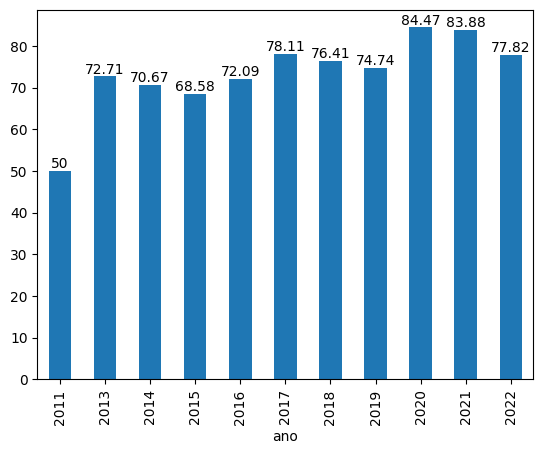

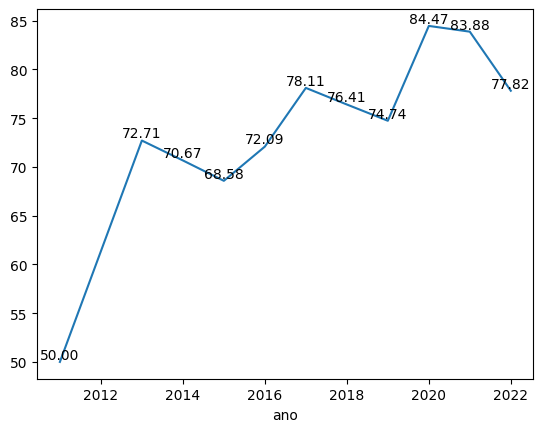

In [22]:
r21 = rep_nota['nota'].mean()
print('\n2. Média de nota dos reprovados por nota no período total:')
print(r21)
r22 = rep_nota.groupby('ano')['nota'].mean()
print('\n2. Média de nota dos reprovados por nota por ano: ')
print(r22)

gr12 = r12.plot(kind='bar')
gr12.bar_label(gr12.containers[0],size=10)
plt.show()

gr12 = r12.plot(kind='line')
points = gr12.get_lines()[0].get_xydata()
for point in points:
    gr12.text(point[0], point[1], f'{point[1]:.2f}', fontsize=10, ha='center', va='bottom')
plt.show()

3. Qual é a frequência dos reprovados por nota (período total e por ano)?

In [23]:
r31 = df['rep_nota_int'].mean()
print('\n3. Frequência dos reprovados por nota no período total:')
print(r31)
r32 = df.groupby('ano')['rep_nota_int'].mean()
print('\n3. Frequência dos reprovados por nota por ano: ')
print(r32)


3. Frequência dos reprovados por nota no período total:
0.21148825065274152

3. Frequência dos reprovados por nota por ano: 
ano
2011    0.000000
2012    0.500000
2013    0.300000
2014    0.083333
2015    0.181818
2016    0.100000
2017    0.235955
2018    0.241758
2019    0.231405
2020    0.083333
2021    0.282609
2022    0.223140
Name: rep_nota_int, dtype: float64


In [24]:
# 4. Qual a porcentagem de evasões (total e anual)?
r41 = df['sit_evasao_int'].mean()
print('\n4. Porcentagem de evasões no período total:')
print(r41)
r42 = df.groupby('ano')['sit_evasao_int'].mean()
print('\n4. Porcentagem de evasões por ano: ')
print(r42)


4. Porcentagem de evasões no período total:
0.15274151436031333

4. Porcentagem de evasões por ano: 
ano
2011    0.000000
2012    0.000000
2013    0.700000
2014    0.250000
2015    0.151515
2016    0.140000
2017    0.191011
2018    0.241758
2019    0.157025
2020    0.177083
2021    0.123188
2022    0.024793
Name: sit_evasao_int, dtype: float64


In [25]:
# 5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores,
# considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações?
# Considere como anos de pandemia os anos de 2020 e 2021.
gp_ref = 'anos_pandemia'
gp_comp = 'anos_referencia'

print(f'\n5. Comparando os {gp_ref} com os {gp_comp} (anos anteriores):')

rendimento_aprovados = aprovados.groupby('periodo_grupo')['nota'].mean()
rendimento_aprovados = rendimento_aprovados[[gp_ref,gp_comp]]
print('\nMédia de nota dos aprovados:')
print(rendimento_aprovados)

comp_rendimento = (rendimento_aprovados[gp_ref] / rendimento_aprovados[gp_comp])
print(f'\nComparação de média de nota dos aprovados ({gp_ref} / {gp_comp}):')
print(comp_rendimento)


taxa_cancelamento = df.groupby('periodo_grupo')['status_cancelado_int'].mean()
taxa_cancelamento = taxa_cancelamento[[gp_ref,gp_comp]]
print('\nTaxa de cancelamento dos períodos:')
print(taxa_cancelamento)

comp_taxa_cancelamento = (taxa_cancelamento[gp_ref] / taxa_cancelamento[gp_comp])
print(f'\nComparação da taxa de cancelamento ({gp_ref} / {gp_comp}):')
print(comp_taxa_cancelamento)


taxa_reprovacao = df.groupby('periodo_grupo')['rep_todos_int'].mean()
taxa_reprovacao = taxa_reprovacao[[gp_ref,gp_comp]]
print('\nTaxa de reprovação dos períodos:')
print(taxa_reprovacao)

comp_taxa_reprovacao = (taxa_reprovacao[gp_ref] / taxa_reprovacao[gp_comp])
print(f'\nComparação da taxa de reprovação ({gp_ref} / {gp_comp}):')
print(comp_taxa_reprovacao)


5. Comparando os anos_pandemia com os anos_referencia (anos anteriores):

Média de nota dos aprovados:
periodo_grupo
anos_pandemia      84.156250
anos_referencia    74.711409
Name: nota, dtype: float64

Comparação de média de nota dos aprovados (anos_pandemia / anos_referencia):
1.1264176473230327

Taxa de cancelamento dos períodos:
periodo_grupo
anos_pandemia      0.141026
anos_referencia    0.004866
Name: status_cancelado_int, dtype: float64

Comparação da taxa de cancelamento (anos_pandemia / anos_referencia):
28.98076923076923

Taxa de reprovação dos períodos:
periodo_grupo
anos_pandemia      0.286325
anos_referencia    0.270073
Name: rep_todos_int, dtype: float64

Comparação da taxa de reprovação (anos_pandemia / anos_referencia):
1.06017556017556


In [26]:
# 6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.
gp_ref = 'semestre_hib_22_1'
gp_comp = 'anos_pandemia'

print(f'\n6. Comparando os {gp_ref} com os {gp_comp}:')

rendimento_aprovados = aprovados.groupby('periodo_grupo')['nota'].mean()
rendimento_aprovados = rendimento_aprovados[[gp_ref,gp_comp]]
print('\nMédia de nota dos aprovados:')
print(rendimento_aprovados)

comp_rendimento = (rendimento_aprovados[gp_ref] / rendimento_aprovados[gp_comp])
print(f'\nComparação de média de nota dos aprovados ({gp_ref} / {gp_comp}):')
print(comp_rendimento)


taxa_cancelamento = df.groupby('periodo_grupo')['status_cancelado_int'].mean()
taxa_cancelamento = taxa_cancelamento[[gp_ref,gp_comp]]
print('\nTaxa de cancelamento dos períodos:')
print(taxa_cancelamento)

comp_taxa_cancelamento = (taxa_cancelamento[gp_ref] / taxa_cancelamento[gp_comp])
print(f'\nComparação da taxa de cancelamento ({gp_ref} / {gp_comp}):')
print(comp_taxa_cancelamento)


taxa_reprovacao = df.groupby('periodo_grupo')['rep_todos_int'].mean()
taxa_reprovacao = taxa_reprovacao[[gp_ref,gp_comp]]
print('\nTaxa de reprovação dos períodos:')
print(taxa_reprovacao)

comp_taxa_reprovacao = (taxa_reprovacao[gp_ref] / taxa_reprovacao[gp_comp])
print(f'\nComparação da taxa de reprovação ({gp_ref} / {gp_comp}):')
print(comp_taxa_reprovacao)


6. Comparando os semestre_hib_22_1 com os anos_pandemia:

Média de nota dos aprovados:
periodo_grupo
semestre_hib_22_1    77.818182
anos_pandemia        84.156250
Name: nota, dtype: float64

Comparação de média de nota dos aprovados (semestre_hib_22_1 / anos_pandemia):
0.9246868986935827

Taxa de cancelamento dos períodos:
periodo_grupo
semestre_hib_22_1    0.021277
anos_pandemia        0.141026
Name: status_cancelado_int, dtype: float64

Comparação da taxa de cancelamento (semestre_hib_22_1 / anos_pandemia):
0.15087040618955513

Taxa de reprovação dos períodos:
periodo_grupo
semestre_hib_22_1    0.361702
anos_pandemia        0.286325
Name: rep_todos_int, dtype: float64

Comparação da taxa de reprovação (semestre_hib_22_1 / anos_pandemia):
1.263258177199111


In [27]:
# 7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.
n_alunos = df[df['ano'] == 2022].drop_duplicates(subset=['matricula','ano','periodo'])
n_aluno = n_alunos.groupby('periodo_grupo')['matricula'].count()
print(f'\n7. Comparando o número de alunos matriculados em cada semestre de 2022:')
print(n_aluno)
print(f'\nComparação do número de alunos matriculados (semestre_hib_22_2 / semestre_hib_22_2):')
print(n_aluno['semestre_hib_22_2'] / n_aluno['semestre_hib_22_1'])
print('\n*Como os dados do segundo semestre de 2022 constam com o semestre em andamento,\nnão há como comparar as notas e taxas de cancelamento e reprovação como anteriormente.')


7. Comparando o número de alunos matriculados em cada semestre de 2022:
periodo_grupo
semestre_hib_22_1    94
semestre_hib_22_2    27
Name: matricula, dtype: int64

Comparação do número de alunos matriculados (semestre_hib_22_2 / semestre_hib_22_2):
0.2872340425531915

*Como os dados do segundo semestre de 2022 constam com o semestre em andamento,
não há como comparar as notas e taxas de cancelamento e reprovação como anteriormente.
